# AMAZON STOCK DATA ANALYSIS WITH MACHINE LEARNING #
This notebook is the analysis and comparison of different regression models applied and viualized on Amazon Stock Data.

In [1]:

import pandas as pd
import numpy as np

#machine learning libraries
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor

#visualization library
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
#reading the csv file and seeing how the data looks
df=pd.read_csv("AMZN (1).csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-10-26,3198.739990,3282.979980,3153.300049,3207.040039,3207.040039,5901200
1,2020-10-27,3224.939941,3291.659912,3211.300049,3286.330078,3286.330078,4291000
2,2020-10-28,3249.300049,3264.020020,3162.469971,3162.780029,3162.780029,5588300
3,2020-10-29,3201.270020,3257.250000,3164.000000,3211.010010,3211.010010,6596500
4,2020-10-30,3157.750000,3167.000000,3019.000000,3036.149902,3036.149902,8386400


Using only the date and Close price for the notebook

In [3]:
#adding a new column named as Ticks and will be using it in machine learning time series model 
df['Ticks']=range(0,len(df.index))

df['Date']=pd.to_datetime(df['Date'])
x=df[['Date','Ticks']]

y=df['Close']
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume,Ticks
0,2020-10-26,3198.739990,3282.979980,3153.300049,3207.040039,3207.040039,5901200,0
1,2020-10-27,3224.939941,3291.659912,3211.300049,3286.330078,3286.330078,4291000,1
2,2020-10-28,3249.300049,3264.020020,3162.469971,3162.780029,3162.780029,5588300,2
3,2020-10-29,3201.270020,3257.250000,3164.000000,3211.010010,3211.010010,6596500,3
4,2020-10-30,3157.750000,3167.000000,3019.000000,3036.149902,3036.149902,8386400,4


## Visualizing the data

## 1.Scatter Plot 

Text(0, 0.5, 'Price (in $)')

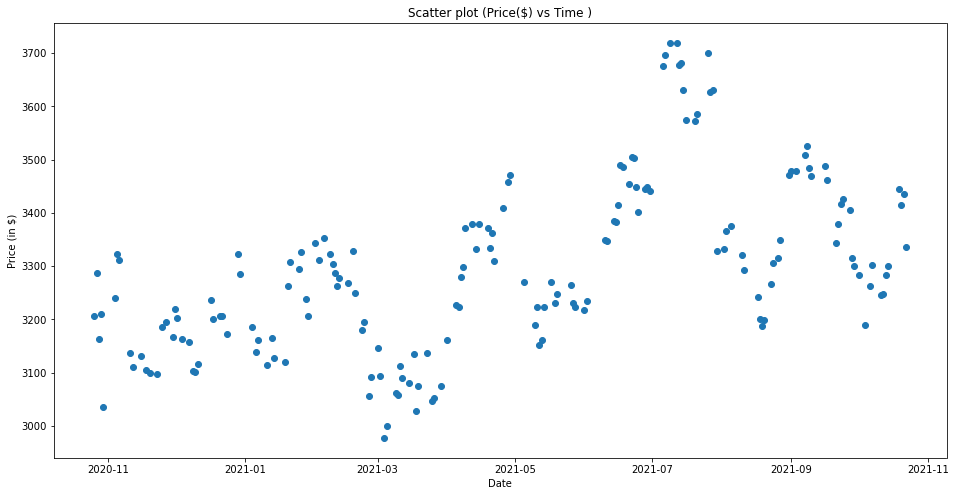

In [4]:
#splitting the data into train and test data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)


plt.figure(figsize=(16,8))
plt.scatter(x_train['Date'],y_train)
plt.title('Scatter plot (Price($) vs Time )')
plt.xlabel('Date')
plt.ylabel('Price (in $)')

## 2. Linear Regression Model 

In [6]:
#building up the model
lin_reg=linear_model.LinearRegression()
lin_reg.fit(x_train[['Ticks']],y_train)

LinearRegression()

Text(0, 0.5, 'Price (in $)')

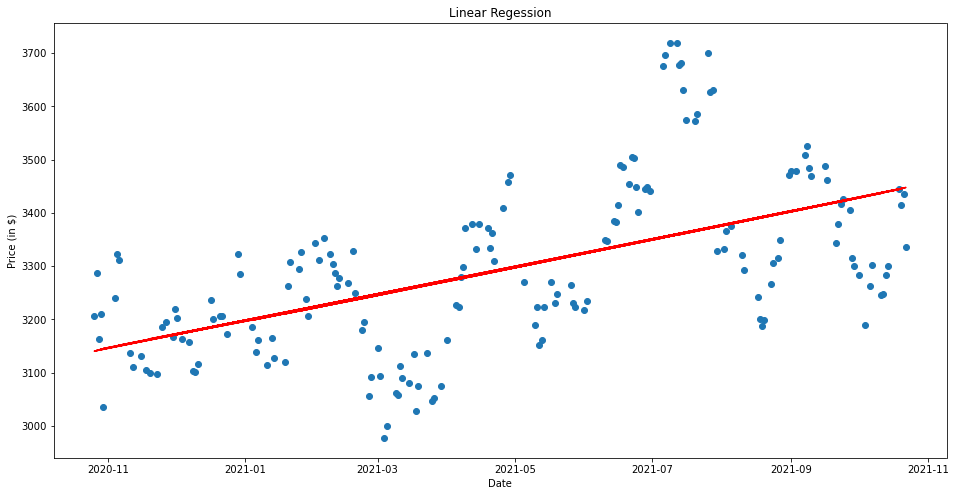

In [7]:
#Scatter plot and linear model plot

plt.figure(figsize=(16,8))
plt.scatter(x_train['Date'],y_train)
plt.plot(x_train['Date'],lin_reg.predict(x_train[['Ticks']]),c='r')
plt.title('Linear Regession')
plt.xlabel('Date')
plt.ylabel('Price (in $)')

## Polynomial Regression

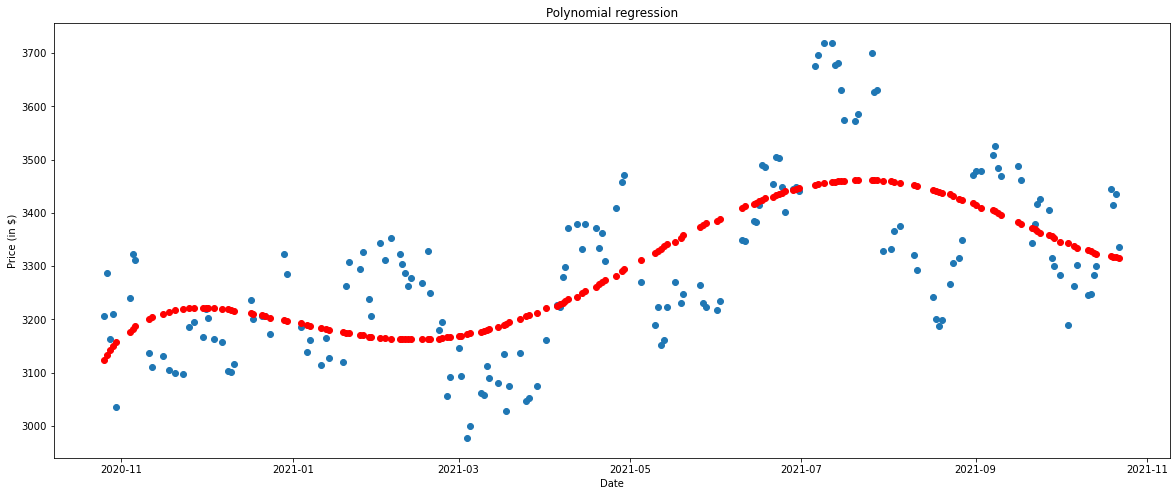

In [8]:
#building up polynomial regression model

#after trying many values for degree , degree=5 seems optimal

poly_f= PolynomialFeatures(degree=5)

#transforming data for the regression
X_poly=poly_f.fit_transform(x_train['Ticks'].values.reshape(-1,1))
poly_reg=linear_model.LinearRegression()
poly_reg.fit(X_poly,y_train)


#Scatter Plot and polynomial model plot

plt.figure(figsize=(20,8))
plt.title('Polynomial regression')
plt.xlabel('Date')
plt.ylabel('Price (in $)')

plt.scatter(x_train['Date'],y_train)
plt.scatter(x_train['Date'],poly_reg.predict(X_poly),c='r',)


## 3. KNN Regression Model 

Text(0, 0.5, 'Price (in $)')

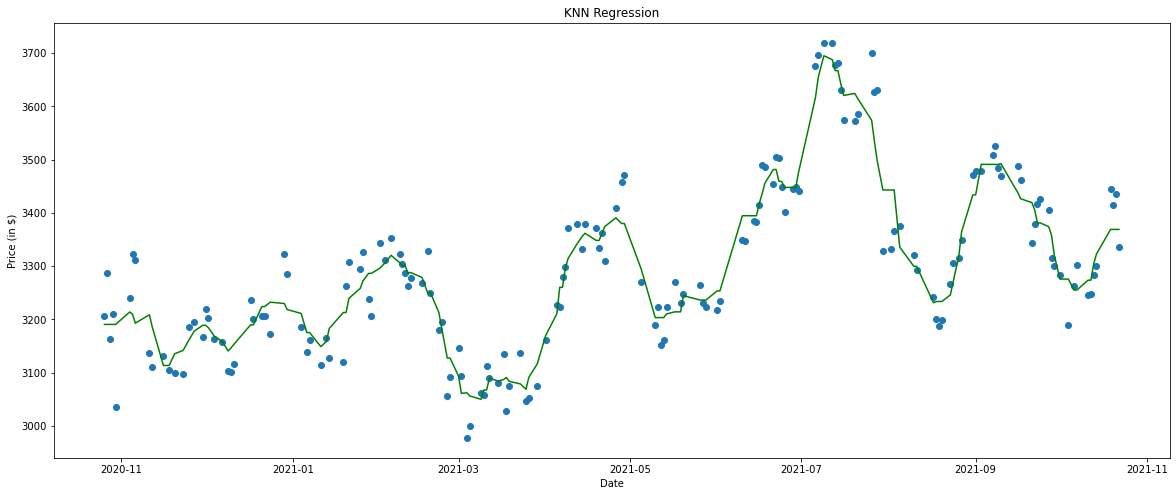

In [9]:
#building up KNN regression model
knn=KNeighborsRegressor(n_neighbors=6)


knn.fit(x_train[['Ticks']],y_train)
plt.figure(figsize=(20,8))

#Scatter plot and KNN Regression plot

plt.scatter(x_train['Date'],y_train)
#copying the data and sorting it so that the line plot can work correctly
#otherwise the line plot goes zig zag all over the graph  
x_train1=x_train.copy()
x_train1=x_train1.sort_values(by='Ticks')
plt.plot(x_train1['Date'],knn.predict(x_train1[['Ticks']]),c='g',)
plt.title('KNN Regression')
plt.xlabel('Date')
plt.ylabel('Price (in $)')

## Checking the accuracy

In [10]:
lin_reg.score(x_train[['Ticks']],y_train)

0.31425588196932863

In [11]:
poly_reg.score(X_poly,y_train)

0.4776885362679274

In [12]:
knn.score(x_train[['Ticks']],y_train)

0.9131585684808072

In [14]:
#transforming the test data for measuring model score
x_poly_test=poly_f.fit_transform(x_test['Ticks'].values.reshape(-1,1))

#Test data model score
print('linear regression model:' lin_reg.score(x_test[['Ticks']],y_test))
print('polynomial regression model:'poly_reg.score(x_poly_test,y_test))
print('knn regression model:' knn.score(x_test[['Ticks']],y_test))

0.387299382286988
0.43814156061720577
0.8494073058602923


As we can see knn regression has the highest accuracy .Linear and Polynomial Regression have lower accuracy score value but they can be used for visualizing what is the basic trend(upward or downward ) of the stock values.